# Q1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## A

In [45]:
finance = pd.read_csv("finance_popularity.csv")

In [47]:
finance["month"] = pd.date_range(start = '2004-01-01', end = '2020-01-01', freq='MS')

In [48]:
finance.set_index("month", inplace = True)

Text(0, 0.5, 'Relative Search Interest')

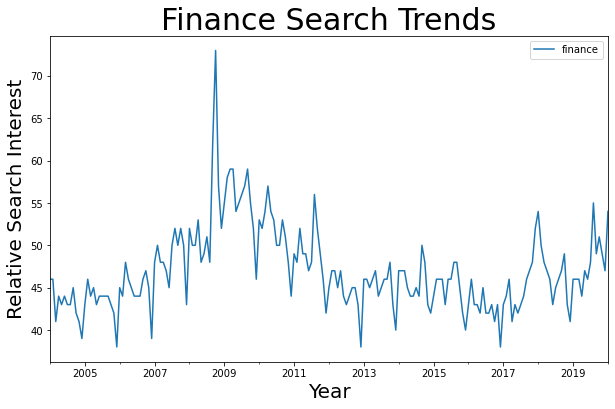

In [50]:
finance.plot(figsize = (10,6))
plt.title("Finance Search Trends",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

there seems to be a seasonality of 12 months according to the local bottom then a local peak at the start of each year, thus the data is not stationary

## B

Text(0, 0.5, 'Relative Search Interest')

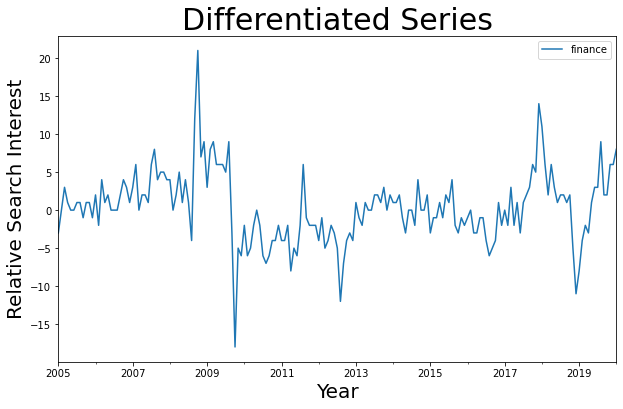

In [64]:
finance_year_diff=finance.diff(periods=12)
finance_year_diff=finance_year_diff.dropna() #remove 12 first NaNs

finance_year_diff.plot(figsize = (10,6))
plt.title("Differentiated Series",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

we removed the yearly seasonality and also we can see that there is no trend as the data is disributed around 0 therefore the data is stationary

# C

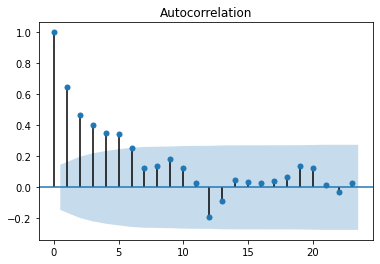

In [40]:
tsaplots.plot_acf(finance_year_diff);

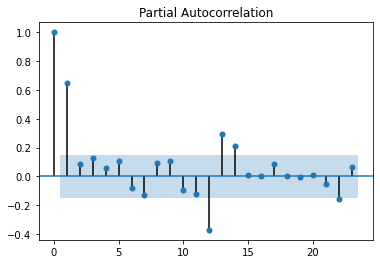

In [39]:
tsaplots.plot_pacf(finance_year_diff);

the pacf is around zero at 3 or more lags, thus we can assume that a good model would be $AR(2)$ or $SARIMA(2,0,0)(1,1,0)_{12}$

## D

### $SARIMA(2,0,0)(1,1,0)_{12}$

In [53]:
sarima_model = SARIMAX(finance, order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
sarima_model_fit = sarima_model.fit(disp=False)
print(sarima_model_fit.summary())

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                            finance   No. Observations:                  193
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -464.106
Date:                            Tue, 13 Feb 2024   AIC                            936.212
Time:                                    16:00:57   BIC                            949.006
Sample:                                01-01-2004   HQIC                           941.399
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5935      0.044     13.570      0.000       0.508       0.679
ar.L2          0.1923      0.063   

### $AR(2)$

In [73]:
arima_model = SARIMAX(finance, order=(2, 0, 0))                             
arima_model_fit = arima_model.fit(disp=False)
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                finance   No. Observations:                  193
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -514.193
Date:                Tue, 13 Feb 2024   AIC                           1034.386
Time:                        16:09:00   BIC                           1044.174
Sample:                    01-01-2004   HQIC                          1038.350
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8166      0.038     21.481      0.000       0.742       0.891
ar.L2          0.1813      0.039      4.674      0.000       0.105       0.257
sigma2        11.7378      0.776     15.125      0.0

## E

$SARIMA(2,0,0)(1,1,0)_{12}$ has a better AIC and BIC so we will choose this as our model, lets try to forcast the last year data (without fitting on it) to check how the model works.

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


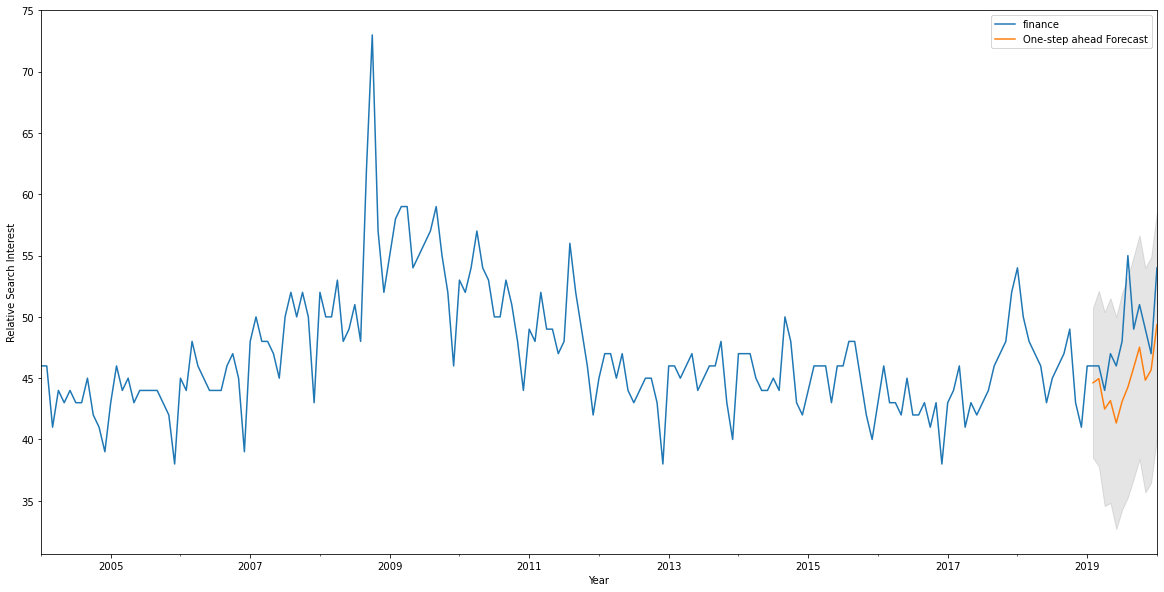

In [130]:
FORECAST = 12
sarima_model_check = SARIMAX(finance[:-FORECAST], order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
sarima_model_check_fit = sarima_model_check.fit(disp=False)

next24m = sarima_model_check_fit.get_forecast(steps=FORECAST)
next24m_ci = next24m.conf_int() 

futureDates = pd.date_range(start = finance.index[-FORECAST], periods=FORECAST, freq='MS')
next24m_ci.index = futureDates
 
futureDF_forecast = pd.DataFrame(next24m.predicted_mean, index=futureDates)

ax = finance.plot(label='observed', figsize=(20, 10))
next24m.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

ax.fill_between(next24m_ci.index,
                next24m_ci.iloc[:, 0],
                next24m_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Year')
ax.set_ylabel('Relative Search Interest')
plt.legend()
plt.show()

a one data sample for checking the model is rather low, lets create a loop to try several years

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


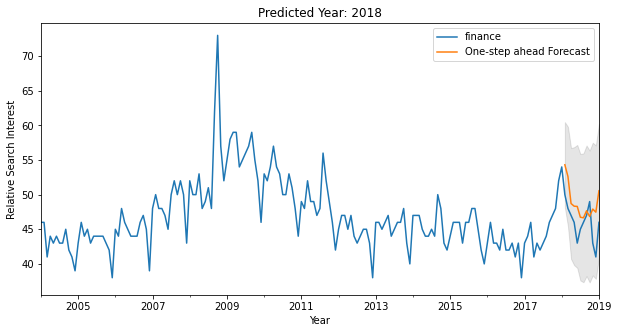

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


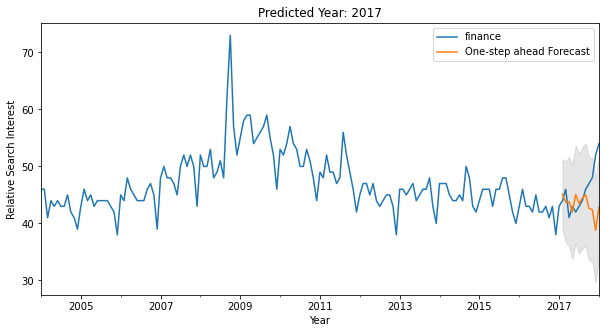

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


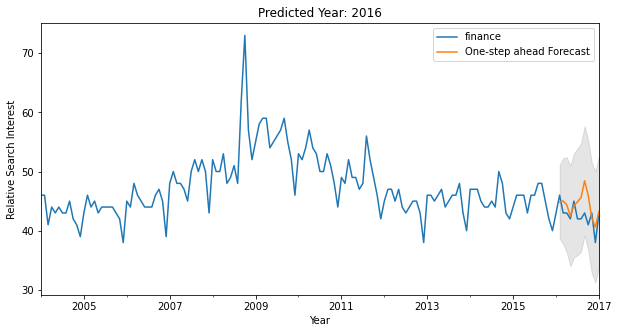

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


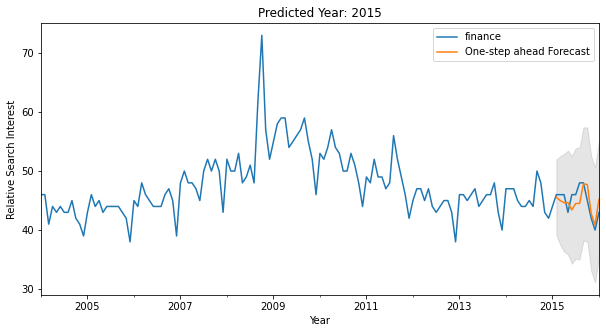

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


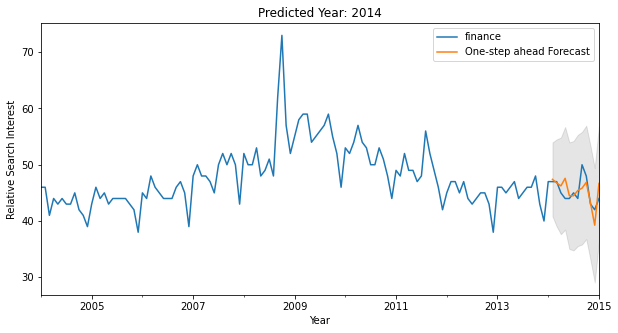

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


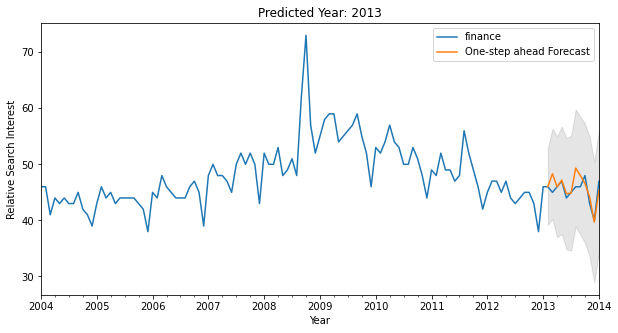

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


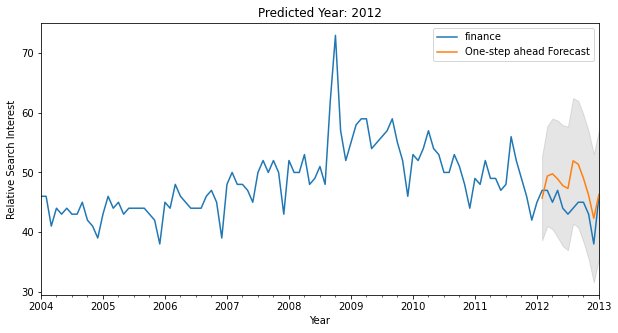

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


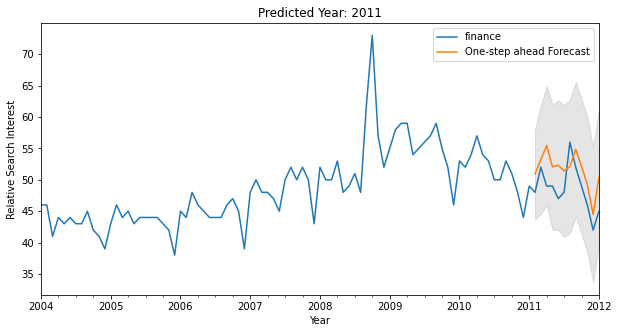

In [145]:
FORECAST = 12
OFFSET = 12
for year, OFFSET in zip(range(2018, 2010, -1), range(12, 9*12,12)):
    sarima_model_check = SARIMAX(finance[:-FORECAST - OFFSET], order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
    sarima_model_check_fit = sarima_model_check.fit(disp=False)

    next24m = sarima_model_check_fit.get_forecast(steps=FORECAST)
    next24m_ci = next24m.conf_int() 

    futureDates = pd.date_range(start = finance.index[-FORECAST- OFFSET], periods=FORECAST, freq='MS')
    next24m_ci.index = futureDates

    futureDF_forecast = pd.DataFrame(next24m.predicted_mean, index=futureDates)

    ax = finance[:- OFFSET].plot(label='observed', figsize=(10, 5))
    next24m.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

    ax.fill_between(next24m_ci.index,
                    next24m_ci.iloc[:, 0],
                    next24m_ci.iloc[:, 1], color='k', alpha=.1)
    
    ax.set_title(f"Predicted Year: {year}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Relative Search Interest')
    plt.legend()
    plt.show()

the model seem to work quite well, i tried some different models but did not get much better AIC, BIC and plots

# Q2

## A

## B

## C

## D

## E

## F